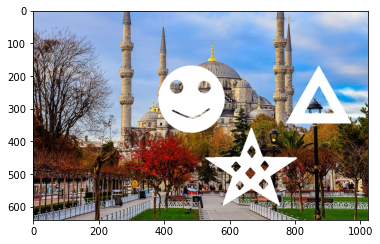

In [10]:
import cv2
import matplotlib.pyplot as plt

kucukResim = cv2.imread('25_contour.jpg')
buyukResim = cv2.imread('7_sultan_ahmet.jpg')
kucukResim = cv2.cvtColor(kucukResim, cv2.COLOR_RGB2BGR)
buyukResim = cv2.cvtColor(buyukResim, cv2.COLOR_RGB2BGR)

kYukseklik, kGenislik, kKanal = kucukResim.shape
bYukseklik, bGenislik, bKanal = buyukResim.shape

roi_alan = buyukResim[bYukseklik-kYukseklik:, bGenislik-kGenislik:]
kucukResimGray = cv2.cvtColor(kucukResim, cv2.COLOR_BGR2GRAY)

ret, maske = cv2.threshold(kucukResimGray, 10, 255, cv2.THRESH_BINARY)

maske_tersi = cv2.bitwise_not(maske)
roi_alan_bg = cv2.bitwise_and(roi_alan, roi_alan, mask = maske_tersi)
roi_alan_fg = cv2.bitwise_and(kucukResim, kucukResim, mask = maske)

birlesmisParca = cv2.add(roi_alan_bg, roi_alan_fg)

buyukResim[bYukseklik-kYukseklik:, bGenislik-kGenislik:] = birlesmisParca

plt.imshow(buyukResim)